In [84]:
import glob
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import Normalizer


from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

import os #Miscellaneous operating system interfaces
#https://docs.python.org/3/library/os.html
#get current working directory
path = os.getcwd() + '\\images\\image_train'
path

model_type = 'Functional'
existing_model = 'RNN'
version = 'v4'
filename = existing_model + '_' +  version
model_path = 'models_output\\' + existing_model + '\\' + version + '\\'

In [29]:
#V3
X = pd.read_csv(r'C:\Users\Edgar\Documents\Rakuten\X_train\X_train_lemma-FR_stop_words-FR_no_num-FR_remove_accents-FR_no_special-FR_lemma-EN_stop_words-EN_stop_words-DE_lemma-DE_steem-FR_steem-EN_steem-DE.csv',index_col =0)
y = pd.read_csv(r'C:\Users\Edgar\Documents\Rakuten\Y_train_CVw08PX.csv',index_col=0).squeeze().map(str)

X.rename(columns = {'0':'text'},inplace=True)
X

In [61]:
#V4
X = pd.read_csv(r'C:\Users\Edgar\Documents\Rakuten\X_train_update.csv',index_col =0)
y = pd.read_csv(r'C:\Users\Edgar\Documents\Rakuten\Y_train_CVw08PX.csv',index_col=0).squeeze().map(str)
X.fillna('',inplace=True)
X['text'] = X.apply(lambda line: line['designation'] + line['description'],axis=1)
X

,designation,description,productid,imageid,text
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,La Guerre Des TuquesLuc a des id&eacute;es de ...
...,...,...,...,...,...
84911,The Sims [ Import Anglais ],,206719094,941495734,The Sims [ Import Anglais ]
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,Kit piscine acier NEVADA déco pierre Ø 3.50m x...
84913,Journal Officiel De La Republique Francaise N°...,,440707564,1009325617,Journal Officiel De La Republique Francaise N°...
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,Table Basse Bois De Récupération Massif Base B...


In [62]:
from sklearn.model_selection import train_test_split

# Séparer le jeu de données en données d'entraînement et données test 
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train_text

,designation,description,productid,imageid,text
60735,Carte Postale Typo Aimer - Kiub,Carte postale tendance de la collection Typo d...,2825941333,1208783386,Carte Postale Typo Aimer - KiubCarte postale t...
9118,Garçon - Le Jeu De Plateau !,A propos : Il s¿agit d¿un jeu de cartes dans l...,89102802,856119038,Garçon - Le Jeu De Plateau !A propos : Il s¿ag...
55855,Royaume Des Animaux Ab À Asc,,197015072,936925976,Royaume Des Animaux Ab À Asc
42138,Piscine Jeu Adresse 237x152,0,2824252365,1166755995,Piscine Jeu Adresse 237x1520
10948,United States And European Union Auditor Indep...,,418466190,1017775450,United States And European Union Auditor Indep...
...,...,...,...,...,...
6265,Griottines - Coffret De 5 Cl,Griottines - Coffret de 5 cl Cerises Griottes ...,183256510,938718607,Griottines - Coffret De 5 ClGriottines - Coffr...
54886,1bouquet 7 Têtes Artificielles Pivoine Soie Fe...,1Bouquet 7 têtes artificielles Pivoine Soie Fe...,4086048240,1289079205,1bouquet 7 Têtes Artificielles Pivoine Soie Fe...
76820,Happy Easter Taies D'oreiller En Lin Coussin S...,Happy Easter taies d&#39;oreiller en lin Couss...,3992621069,1273354395,Happy Easter Taies D'oreiller En Lin Coussin S...
860,Pratique Chasse Camo Camping Imperméable Camou...,Pratique Camo chasse furtif étanche Camping Ca...,4231695757,1323296971,Pratique Chasse Camo Camping Imperméable Camou...


In [63]:
import tensorflow as tf
# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=50000,)

# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(X_train_text.text)

In [64]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

In [65]:
idx2word[80000]

'musclesthe'

In [66]:
model = tf.keras.models.load_model(model_path + filename)
model.load_weights(model_path + filename + '.hdf5')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, None)]            0         
_________________________________________________________________
embed_RNN_v4 (Embedding)     (None, None, 256)         47877376  
_________________________________________________________________
GRU_RNN_v4 (GRU)             (None, None, 128)         148224    
_________________________________________________________________
dropout_1RNN_v4 (Dropout)    (None, None, 128)         0         
_________________________________________________________________
batchnormRNN_v4 (GlobalAvera (None, 128)               0         
_________________________________________________________________
dense_2_RNN_v4 (Dense)       (None, 256)               33024     
_________________________________________________________________
dropout_2_RNN_v4 (Dropout)   (None, 256)               0     

In [69]:
for layer in model.layers:
    if 'embed' in layer.name:
        #print(layer.__dict__)
        embed_lay = layer.weights[0].numpy()

In [71]:
vectors = embed_lay

In [72]:
def dot_product(vec1, vec2):
    return np.sum((vec1*vec2))

def cosine_similarity(vec1, vec2):
    return dot_product(vec1, vec2)/np.sqrt(dot_product(vec1, vec1)*dot_product(vec2, vec2))

def find_closest(word_index, vectors, number_closest):
    list1=[]
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if not np.array_equal(vector, query_vector):
            dist = cosine_similarity(vector, query_vector)
            list1.append([dist,index])
    return np.asarray(sorted(list1,reverse=True)[:number_closest])

def compare(index_word1, index_word2, index_word3, vectors, number_closest):
    list1=[]
    query_vector = vectors[index_word1] - vectors[index_word2] + vectors[index_word3]
    normalizer = Normalizer()
    query_vector =  normalizer.fit_transform([query_vector], 'l2')
    query_vector= query_vector[0]
    for index, vector in enumerate(vectors):
        if not np.array_equal(vector, query_vector):
            dist = cosine_similarity(vector, query_vector)
            list1.append([dist,index])
    return np.asarray(sorted(list1,reverse=True)[:number_closest])

def print_closest(word, number=10):
    index_closest_words = find_closest(word2idx[word], vectors, number)
    for index_word in index_closest_words :
        print(idx2word[index_word[1]]," -- ",index_word[0])

In [82]:
print_closest('chaise')

table  --  0.8434886336326599
matelas  --  0.7972735166549683
places  --  0.7965878844261169
rangement  --  0.7624654769897461
aloe  --  0.7602035403251648
fauteuil  --  0.7589187026023865
canapé  --  0.7569292783737183
peva  --  0.7522647976875305
déborder  --  0.7449557185173035
lit  --  0.7441772222518921


In [86]:
index_compare_words = compare(word2idx['voiture'], word2idx['drone'], word2idx['bleu'], vectors, 5)
for index_word in index_compare_words :
    print(idx2word[index_word[1]], " -- ", index_word[0])

bleu  --  0.7280829548835754
box  --  0.7011734843254089
blanc  --  0.6977587342262268
br  --  0.6802735328674316
coin  --  0.6573192477226257


[0.67794466 0.12030058 0.08778261 0.04773162]


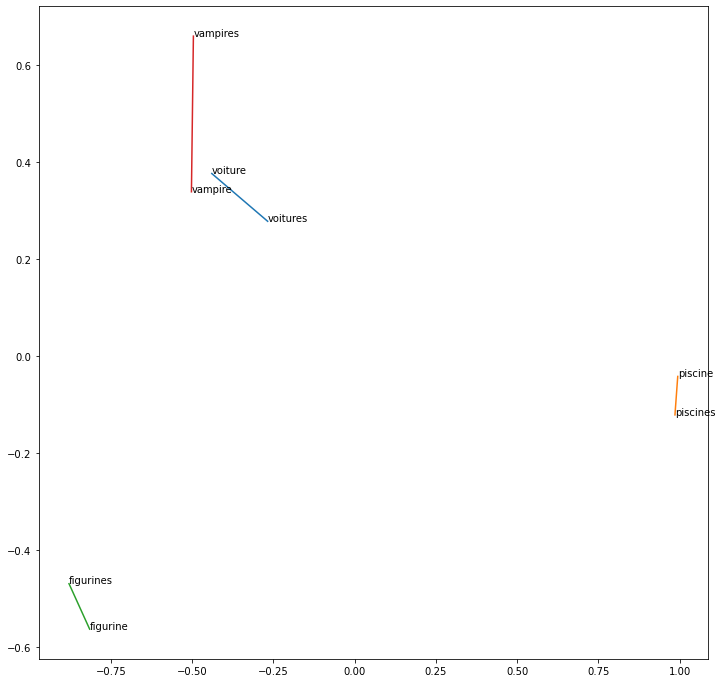

In [88]:
## Run the program.
from sklearn.decomposition import PCA

pairs = [('voitures', 'voiture'),
('piscines', 'piscine'),
('figurine', 'figurines'),
('vampires', 'vampire')]

n=np.shape(pairs)[0]
difference_matrix = np.array([vectors[word2idx[a[0]]]-vectors[word2idx[a[1]]] for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[vectors[word2idx[word]] for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)
normalizer = Normalizer()
coord =  normalizer.fit_transform(coord, 'l2')
print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(figsize=(12,12))

for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))

for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])

plt.show()
